# Forage accenture

In [184]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt 
import numpy as np

## Content Data Set

In [185]:
# import content data
content = pd.read_csv("data/Content.csv") # import csv into a pandas data frame
print(content.shape) # print number of rows and columns
content.head() #show first few rows

(1000, 6)


,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [186]:
content_clean = content[['Content ID','Type','Category']] # select only required columns and save them in a new DataFrame
content_clean.head() #show firat few rows

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [187]:
content_clean = content_clean.rename(columns={'Type': 'ContentType', 'Content ID':'ContentID'}) # rename column names

In [188]:
content_clean['ContentType'].unique() # get all the unique elements in the contentType column

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [189]:
content_clean['Category'].unique() # get all the unique elements in category column

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [190]:
content_clean['Category'] = content_clean['Category'].str.replace('"','') # remove quotation marks in category column
content_clean['Category'] = content_clean['Category'].str.lower() # make everthing lowercases 
content_clean['Category'].unique() # see unique elements

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture'],
      dtype=object)

In [191]:
content_clean.count() # see number of non zero elements in each column

ContentID      1000
ContentType    1000
Category       1000
dtype: int64

In [192]:
content_clean.head(20) #see first 20 rows of cleaned data set

,ContentID,ContentType,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,GIF,cooking
6,3f8590c7-6ab2-4973-805a-90cdec355f05,video,dogs
7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,video,technology
8,0bedca96-fb76-4287-a83c-17330ed39cce,photo,soccer
9,b18cb63f-4c8e-44ee-a47f-541e95191d11,photo,public speaking


## Reactions Data Set

In [193]:
reaction = pd.read_csv('data/Reactions.csv') # load reaction data into a DataFrame
print(reaction.shape) # print the shape of the data set
reaction.head() # Show first few rows of the data frame

(25553, 5)


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [194]:
reaction_clean = reaction[['Content ID','Type','Datetime']] # select few columns from the dataframe and save in a new dataframe
reaction_clean.head() # Show the data frame

,Content ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [195]:
reaction_clean = reaction_clean.rename(columns={'Type': 'ReactionType', 'Content ID':'ContentID'}) # rename column names

In [196]:
reaction_clean['ReactionType'].unique() # get all the unique elements in the ReactionType column

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [197]:
reaction_clean.count() # get number of non empty elemenat in each column

ContentID       25553
ReactionType    24573
Datetime        25553
dtype: int64

In [198]:
reaction_clean.dropna(inplace=True) # Drop rows with NaN
reaction_clean.count() # see nun empty elements 

ContentID       24573
ReactionType    24573
Datetime        24573
dtype: int64

In [199]:
reaction_clean.head(20)# show the dataframe

,ContentID,ReactionType,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23
10,97522e57-d9ab-4bd6-97bf-c24d952602d2,love,2020-08-04 05:05:02


## Reaction Type Data Set

In [200]:
reactiontypes = pd.read_csv('data/ReactionTypes.csv') #upload the reactiontype data set
print(reactiontypes.shape) #shape of the dataframe
reactiontypes.head() # Show the dataframe

(16, 4)


,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [201]:
reactiontypes_clean = reactiontypes[['Type','Sentiment','Score']] #Select required columns
reactiontypes_clean.head() # show dataframe

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [202]:
reactiontypes_clean = reactiontypes_clean.rename(columns={'Type': 'ReactionType'}) # rename column names
reactiontypes_clean['ReactionType'].unique() # get all the unique elements in the ReactionType column

array(['heart', 'want', 'disgust', 'hate', 'interested', 'indifferent',
       'love', 'super love', 'cherish', 'adore', 'like', 'dislike',
       'intrigued', 'peeking', 'scared', 'worried'], dtype=object)

In [203]:
reactiontypes_clean['Sentiment'].unique() # get all the unique elements in the Sentiment column

array(['positive', 'negative', 'neutral'], dtype=object)

In [204]:
reactiontypes_clean.count()

ReactionType    16
Sentiment       16
Score           16
dtype: int64

In [205]:
reactiontypes_clean.head(20) #see reactiontypes_clean table

,ReactionType,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


# Data Modelling

In [206]:
data_merge1 = pd.merge(content_clean,reaction_clean, on='ContentID') # merging dataset content_clean and reaction_celan using the common column "ContentID"
data_merge1.head() #see merged table

,ContentID,ContentType,Category,ReactionType,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58


In [207]:
data_merge2 = pd.merge(data_merge1,reactiontypes_clean, on='ReactionType') #merge reactiontype_clean data set using common column "ReactionType"
print(data_merge2.shape) # print number of rows and columns
data_merge2.tail(20) #see the data set

(24573, 7)


,ContentID,ContentType,Category,ReactionType,Datetime,Sentiment,Score
24553,b2a20047-ac6f-4caa-90b1-fe735433e362,photo,culture,adore,2021-02-15 03:30:17,positive,72
24554,a287c7ad-f5c8-4d87-940b-b7b24e2b42ac,video,fitness,adore,2021-03-29 23:36:42,positive,72
24555,89cb4504-fccd-40f4-945e-410f74ee4735,photo,animals,adore,2020-11-18 17:02:24,positive,72
24556,89cb4504-fccd-40f4-945e-410f74ee4735,photo,animals,adore,2020-10-03 18:30:41,positive,72
24557,89cb4504-fccd-40f4-945e-410f74ee4735,photo,animals,adore,2021-05-08 17:29:47,positive,72
24558,67766c84-7d8d-46e2-b2e8-8b0f8dc27193,photo,veganism,adore,2020-12-06 11:54:26,positive,72
24559,67766c84-7d8d-46e2-b2e8-8b0f8dc27193,photo,veganism,adore,2020-07-11 05:19:14,positive,72
24560,67766c84-7d8d-46e2-b2e8-8b0f8dc27193,photo,veganism,adore,2021-05-20 06:58:50,positive,72
24561,331fad49-0e33-4676-8e2d-51ec52e86625,audio,education,adore,2020-12-04 20:12:06,positive,72
24562,331fad49-0e33-4676-8e2d-51ec52e86625,audio,education,adore,2020-11-26 04:55:07,positive,72


## Top 5 Categories

In [208]:
findtop5 = data_merge2[['Category','Score']] # select "Category" column and "Score" column and save in a new dataframe
print(findtop5.shape) # print number of rows and columns
findtop5.head() #show the dataframe

(24573, 2)


,Category,Score
0,studying,0
1,studying,0
2,studying,0
3,healthy eating,0
4,healthy eating,0


In [209]:
findtop5aggregated = findtop5.groupby(['Category']).sum() #get the agregated sum of score for each category
findtop5aggregated.head(20) #Show the dataframe

,Score
Category,
animals,74965
cooking,64756
culture,66579
dogs,52511
education,57436
fitness,55323
food,66676
healthy eating,69339
public speaking,49264


In [210]:
top5 = findtop5aggregated.nlargest(5,'Score') #get the first five categories with most score
top5.head() # show top5 categories

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [211]:
top5.to_csv('top5categories.csv', sep=',') # write top5 categories in to a csv file

## Data visualization

In [212]:
findtop5aggregatedwithindex = findtop5.groupby(['Category'], as_index=False).sum() #get the agregated sum of score for each category without turning groups into column index
findtop5aggregatedwithindex.head(20) #Show the dataframe

top5withindex = findtop5aggregatedwithindex.nlargest(5,'Score') #get the first five categories with most score
top5withindex.head() # show top5 categories

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


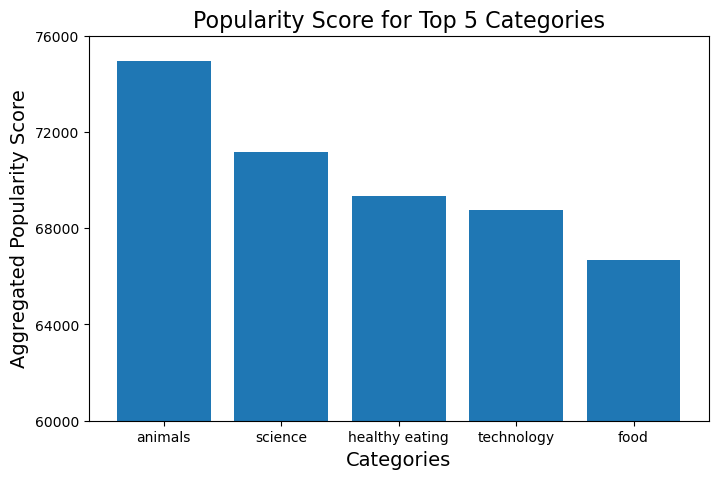

In [213]:
fig = plt.figure(figsize = (8, 5)) 

plt.bar(top5withindex['Category'] ,top5withindex['Score'],  )#color ='magenta')
 
plt.xlabel("Categories",fontsize=14)
plt.ylabel("Aggregated Popularity Score",fontsize=14)
plt.title("Popularity Score for Top 5 Categories",fontsize=16)
plt.ylim(60000,76000)
plt.yticks(np.arange(60000, 78000, 4000))
plt.show()

## Insight of Top 5 Categories

In [214]:
top5insight = data_merge2.query("Category in ('animals','science','healthy eating','technology','food')")
top5insight.tail()

,ContentID,ContentType,Category,ReactionType,Datetime,Sentiment,Score
24556,89cb4504-fccd-40f4-945e-410f74ee4735,photo,animals,adore,2020-10-03 18:30:41,positive,72
24557,89cb4504-fccd-40f4-945e-410f74ee4735,photo,animals,adore,2021-05-08 17:29:47,positive,72
24563,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science,adore,2021-06-09 10:23:47,positive,72
24564,c54b49c4-b1f2-4641-8595-1cbd19937845,photo,science,adore,2020-07-29 13:54:24,positive,72
24565,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology,adore,2020-11-01 01:33:39,positive,72


In [215]:
# top5insight.Score.unique()

### Content Types

In [216]:
animals= top5insight.query("Category in 'animals' ")
animals2 = animals[['ContentType','Score']]
animals2.tail()

animals3 = animals2.groupby(['ContentType'], as_index=False).sum().sort_values(by=['Score'],ascending=False) #get the agregated sum of score
animals3.head(20) #Show the dataframe

,ContentType,Score
2,photo,27128
1,audio,22748
0,GIF,12952
3,video,12137


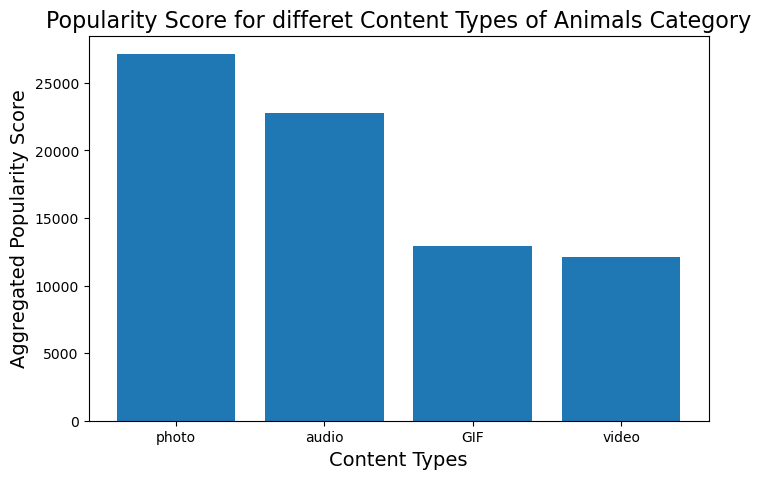

In [217]:
fig = plt.figure(figsize = (8, 5)) 

plt.bar(animals3['ContentType'] ,animals3['Score'], )# color ='magenta')
 
plt.xlabel("Content Types",fontsize=14)
plt.ylabel("Aggregated Popularity Score",fontsize=14)
plt.title("Popularity Score for differet Content Types of Animals Category",fontsize=16)
#plt.ylim(60000,76000)
#plt.yticks(np.arange(0, 25000, 4000))
plt.show()

### Sentiment

In [218]:
SentimentScore= data_merge2[['Sentiment','Score']]

SentimentScore2 = SentimentScore.groupby(['Sentiment'], as_index=False).sum().sort_values(by=['Score'],ascending=False) #get the agregated sum of score
SentimentScore2.head(20) #Show the dataframe

,Sentiment,Score
2,positive,824056
1,neutral,84805
0,negative,64784


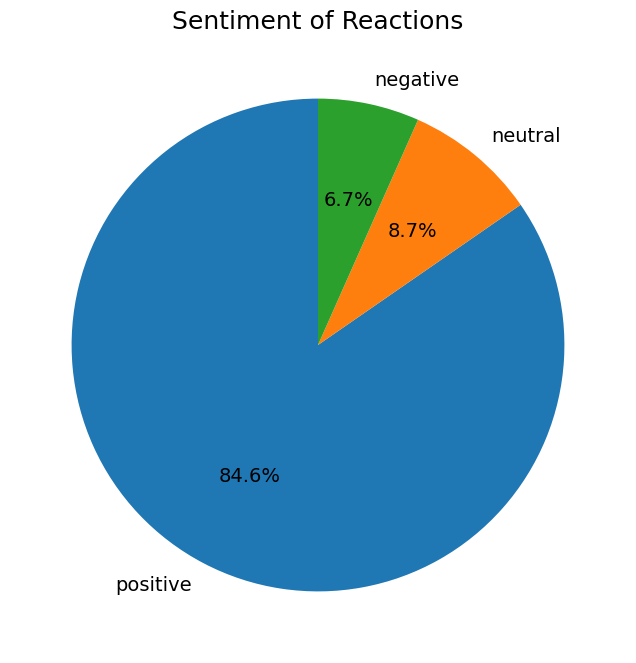

In [227]:
plt.figure(figsize=(8, 8))
plt.pie(SentimentScore2['Score'], labels=SentimentScore2['Sentiment'], autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 14} ) #colors=['magenta','cyan','yellow'],)
plt.title('Sentiment of Reactions',fontsize = 18)
plt.show()

### Date Time

In [220]:
data_merge2.dtypes
data_merge2['Datetime'] = pd.to_datetime(data_merge2['Datetime'])
data_merge2.dtypes

data_merge2.Datetime.dt.day_name()
print(min(data_merge2.Datetime))
print(max(data_merge2.Datetime))

data_merge2['Day'] = data_merge2.Datetime.dt.day_name()
data_merge2['Month'] = data_merge2.Datetime.dt.month_name()
data_merge2['Hour'] = data_merge2.Datetime.dt.hour

data_merge2.head()

2020-06-18 08:07:22
2021-06-18 08:30:29


,ContentID,ContentType,Category,ReactionType,Datetime,Sentiment,Score,Day,Month,Hour
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,Saturday,November,9
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,Wednesday,January,19
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-04-09 02:46:20,negative,0,Friday,April,2
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating,disgust,2021-03-28 21:15:26,negative,0,Sunday,March,21
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating,disgust,2020-08-04 05:40:33,negative,0,Tuesday,August,5


In [221]:
DayScore = data_merge2[['Day','Score']]
DayScore2 = DayScore.groupby(['Day'], as_index=False).sum().sort_values(by=['Score'],ascending=False)  #get the agregated sum of score
DayScore2.head(10)

,Day,Score
0,Friday,142441
4,Thursday,142378
3,Sunday,141664
1,Monday,139713
5,Tuesday,138510
6,Wednesday,135317
2,Saturday,133622


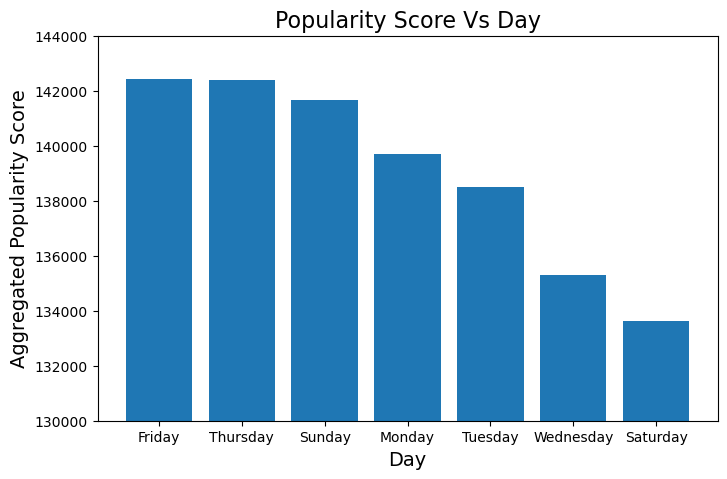

In [222]:
fig = plt.figure(figsize = (8, 5)) 

plt.bar(DayScore2['Day'] ,DayScore2['Score'], )# color ='magenta')

plt.xlabel("Day",fontsize=14)
plt.ylabel("Aggregated Popularity Score",fontsize=14)
plt.title("Popularity Score Vs Day",fontsize=16)
plt.ylim(130000,144000)
#plt.yticks(np.arange(60000, 78000, 4000))
    
plt.show()

In [223]:
MonthScore = data_merge2[['Month','Score']]
MonthScore2 = MonthScore.groupby(['Month'], as_index=False).sum().sort_values(by=['Score'],ascending=False)  #get the agregated sum of score
MonthScore2.head(15)

,Month,Score
8,May,86293
4,January,82938
10,October,82810
5,July,82464
9,November,82333
1,August,82176
2,December,81163
6,June,80369
11,September,80077
7,March,78915


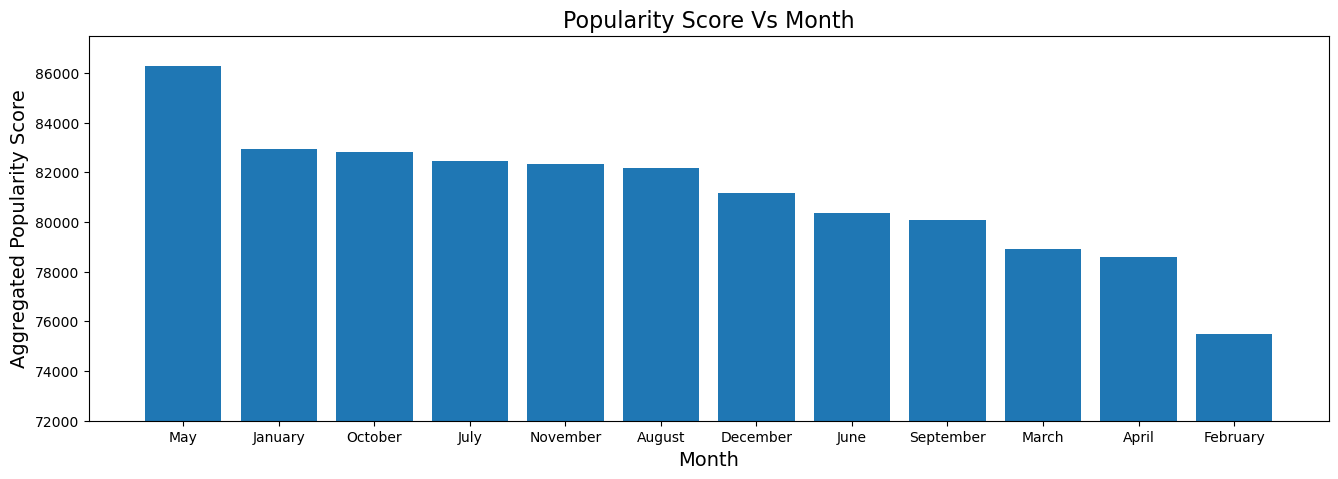

In [224]:
fig = plt.figure(figsize = (16, 5)) 

plt.bar(MonthScore2['Month'] ,MonthScore2['Score'], )# color ='magenta')

plt.xlabel("Month",fontsize=14)
plt.ylabel("Aggregated Popularity Score",fontsize=14)
plt.title("Popularity Score Vs Month",fontsize=16)
plt.ylim(72000,87500)
#plt.yticks(np.arange(60000, 78000, 4000))
    
plt.show()

In [225]:
HourScore = data_merge2[['Hour','Score']]
HourScore2 = HourScore.groupby(['Hour'], as_index=False).sum().sort_values(by=['Score'],ascending=False)  #get the agregated sum of score
HourScore2.head(10)

,Hour,Score
6,6,43043
23,23,42583
9,9,41941
8,8,41631
16,16,41589
5,5,41528
21,21,41248
11,11,41162
7,7,41039
15,15,41023


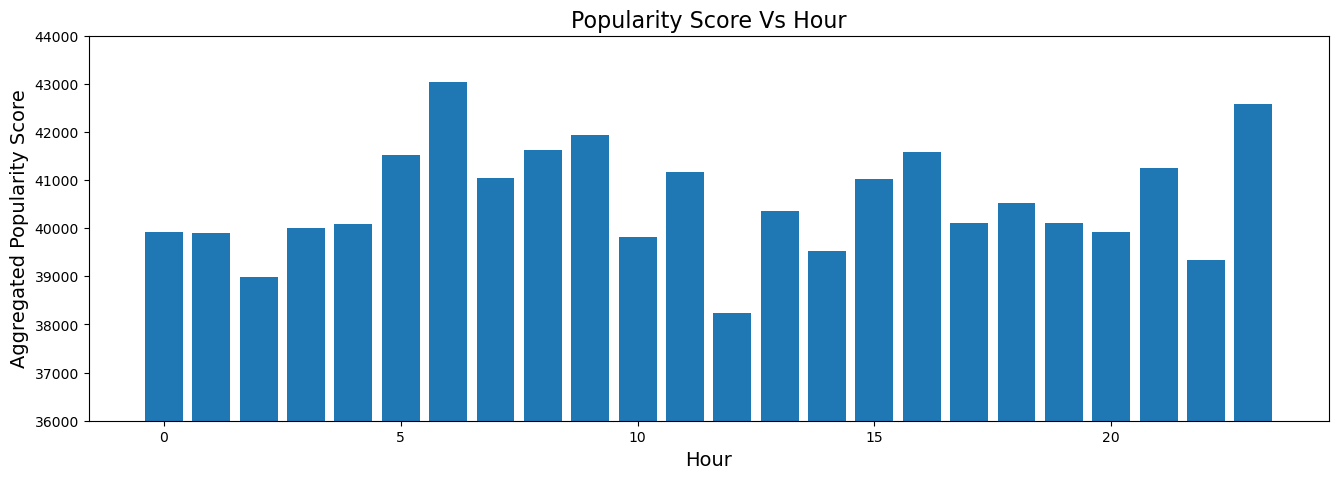

In [226]:
fig = plt.figure(figsize = (16, 5)) 

plt.bar(HourScore2['Hour'] ,HourScore2['Score'], )# color ='magenta')
 
plt.xlabel("Hour",fontsize=14)
plt.ylabel("Aggregated Popularity Score",fontsize=14)
plt.title("Popularity Score Vs Hour",fontsize=16)
plt.ylim(36000,44000)
#plt.yticks(np.arange(60000, 78000, 4000))    

plt.show()